In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt
import cv2


(34,)


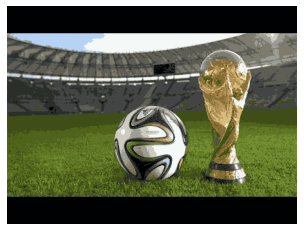

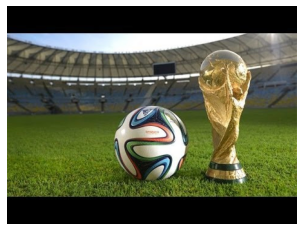

In [ ]:
#load the image and grab its width and height
image = cv2.imread("/content/drive/MyDrive/colab_img/hqdefault.jpg")
h, w = image.shape[:2]

#convert the image from the RGB color space to the L*a*b color space -- since 
#we will be clustering using kMeans which is based on the euclidean distance,
#we'll use the L*a*b color space where the euclidean distance implies perceptual 
#meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#reshape the image into a feature vector so that k-means can be applied
image = image.reshape((h*w), 3)

#apply k-means using the specified number of clusters and then create the 
#quantized image based on the predictions
clusters = 16
clt = MiniBatchKMeans(n_clusters=clusters)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype(np.uint8)[labels]
print(np.unique(quant).shape)

#reshape the feature vectors to images
quant = quant.reshape((h,w,3))
image = image.reshape((h,w,3))

#convert from L*a*b to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)

#display
plt.axis("off")
plt.imshow(quant)
plt.show()

plt.axis("off")
plt.imshow(image)
plt.show()

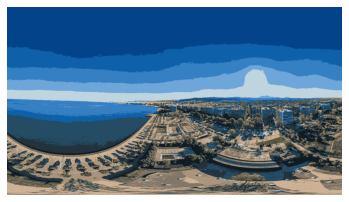

In [7]:
img = cv2.imread("/content/drive/MyDrive/colab_img/R.jfif")
h,w = img.shape[:2]
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = img.reshape((h*w, 3))

clusters = 12
clt = MiniBatchKMeans(n_clusters=clusters)
labels = clt.fit_predict(img)
quant = clt.cluster_centers_[labels].astype(np.uint8)

quant = quant.reshape((h,w,3))
img = img.reshape((h,w,3))

quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)


plt.axis("off")
plt.imshow(quant)
plt.show()

In [22]:
def centroids(clt):
  numLabels = np.arange(0, len(clt.labels_)+1)
  hist, _ = np.histogram(clt.labels_, bins=numLabels)
  hist = hist.astype(np.float32)

  hist /= hist.sum()
  return hist

def plot_color( hist, clt):
  bar = np.zeros((50, 300, 3), dtype=np.uint8)
  startX = 0
  
  for percent, color in zip(hist, clt.cluster_centers_):
    endX = startX + (percent*300)
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype(np.uint8).tolist() , -1)
    startX = endX
  
  return bar


In [25]:
for color in clt.cluster_centers_:
  print(color)
  print(color.astype(np.uint8).tolist())

[139.12083827 124.89683216 108.38056143]
[139, 124, 108]
[  6.85754816  71.33251575 135.83549434]
[6, 71, 135]
[ 95.05419087 156.42183555 215.61617393]
[95, 156, 215]
[21.4204088  45.02301517 55.12372493]
[21, 45, 55]
[187.54380781 209.81884203 222.32663862]
[187, 209, 222]
[ 37.39075537 112.82334071 182.66867889]
[37, 112, 182]
[79.29526715 83.90952437 77.5878996 ]
[79, 83, 77]
[196.16564716 168.74636244 141.58919599]
[196, 168, 141]


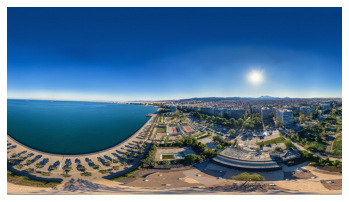

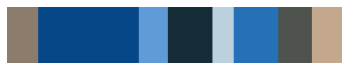

In [23]:
from sklearn.cluster import KMeans
img = cv2.imread("/content/drive/MyDrive/colab_img/R.jfif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)
plt.show()
h,w = img.shape[:2]
img = img.reshape((h*w, 3))
clusters = 8
clt = KMeans(n_clusters=clusters)
clt.fit(img)

hist = centroids(clt)
bar = plot_color(hist, clt)

plt.axis("off")
plt.imshow(bar)
plt.show()
